Parameters: a = 5 , b = 3
Parameters: a_generated = [5.06615021] , b_generated = [2.99221816]
Difference: a_error = [0.06615021] , b_error = [0.00778184]


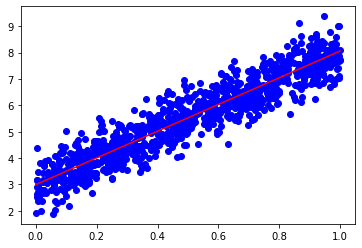

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Створення масиву із n випадкових чисел в діапазоні 0..1
num_of_elements = 1000
x = np.random.rand(num_of_elements, 1) 

# ініціалізація значень a, b
a=5
b=3

# функція y = f(x) + гауссів шум np.random.normal(3, 5.5, size=(num_of_elements, 1))
y = a * x + b + 0.1 * np.random.normal(0, 5.5, size=(num_of_elements, 1))

print("Parameters: a =",a,", b =",b)

# Формування індексів
train_idx = np.arange(num_of_elements)
# змішуємо індекси в масиві
np.random.shuffle(train_idx)

# формування наборів навчальних даних
x_train, y_train = x[train_idx], y[train_idx]

# початкові значення коефіцієнтів регресії
a_gen = np.random.randn(1)
b_gen = np.random.randn(1)

# швидкість навчання
learning_speed = 0.01
# кількість ітерацій
iterations = 11000

for iteration in range(iterations):
  
    # результуючий масив з коефіцієнтами a и b
    yhat = a_gen * x_train + b_gen
    
    # відхилення результату від навчального
    error = (y_train - yhat)
    
    # підрахунок градієнтів
    a_grad = -2 * (x_train * error).mean()
    b_grad = -2 * error.mean()
    
    # оновлення параметрів
    a_gen = a_gen - learning_speed * a_grad
    b_gen = b_gen - learning_speed * b_grad

print("Parameters: a_generated =",a_gen,", b_generated =",b_gen)
print("Difference: a_error =",abs(a-a_gen),", b_error =",abs(b-b_gen))

t = np.linspace(0,1,300)
y_t = a_gen*t+b_gen
plt.plot(t, y_t, color="red")
plt.scatter(x_train, y_train, color="blue")

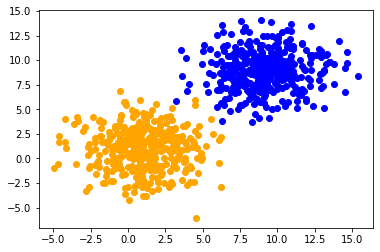

In [11]:
###########################################   PART II   Logistic Regression ####################################################
################################################################################################################################
num_of_elements = 400
num_of_test_elements = 200

# ініціалізація значень x, y
x_train = np.random.normal(1, 2.0, size=(num_of_elements, 2))
x_train = np.concatenate((x_train, np.zeros((num_of_elements,1))),axis=1)

y_train = np.random.normal(9, 2.0, size=(num_of_elements, 2))
y_train = np.concatenate((y_train, np.full((num_of_elements,1),1.0)),axis=1)

# формування тренувальної вибірки
train = np.concatenate((x_train, y_train), axis=0)

# формування індексів
train_idx = np.arange(2*num_of_elements)
# змішуємо індекси в масиві
np.random.shuffle(train_idx)
# змішуємо індекси в масиві
train = train[train_idx]

x_test = np.random.normal(1, 2.0, size=(num_of_test_elements, 2))
x_test = np.concatenate((x_test, np.zeros((num_of_test_elements,1))),axis=1)
y_test = np.random.normal(9, 2.0, size=(num_of_test_elements, 2))
y_test = np.concatenate((y_test, np.full((num_of_test_elements,1),1.0)),axis=1)

test = np.concatenate((x_test, y_test), axis=0)
test_idx = np.arange(2*num_of_test_elements)
np.random.shuffle(test_idx)
test = test[test_idx]

plt.scatter(x_train[:,0], x_train[:,1], color = "orange")
plt.scatter(y_train[:,0], y_train[:,1], color = "blue")

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Accuracy on train split: 98.5


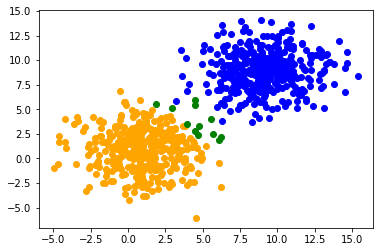

In [13]:
def predict(x, w, b):
    return np.array([sigmoid(x_i.reshape(1, n).dot(w) + b)[0][0] 
                    for x_i in x])

def gradient_descent(x, y, n, m):
    learning_speed = 0.005 
    Iterations = 3000
    
    # ініціалізація параметрів w, b
    w = np.random.randn(n, 1) * 0.001
    b = np.random.randn() * 0.001
    
    len_x = len(x);
    
    for iteration in range(Iterations):            
        dw = np.zeros((n, 1))
        db = 0.0
        
        for i in range(len_x):
            
            z = x[i].reshape(1, n).dot(w) + b
            p = sigmoid(z)[0][0]

            # похідні
            dw += (p - y[i]) * x[i].reshape(n, 1)
            db += (p - y[i])

        dw /= len_x
        db /= len_x
        # обчислення градієнта
        w = w - learning_speed * dw
        b = b - learning_speed * db
             
    return w, b

def accuracy(result, t_arr,y):
    TP_TN = 0
    FP_FN = 0
    
    FP_FN_arr = []
    TP = []
    TN = []
    
    for i in range(len(result)):

        if result[i] >= 0.5: result[i] = 1
        else: result[i] = 0

        if result[i] == y[i]:
            TP_TN = TP_TN+1
            
            if result[i] == 0:
                TP.append(i)
            elif result[i] == 1:
                TN.append(i)
                
        elif result[i] != y[i]: 
            FP_FN = FP_FN+1
            FP_FN_arr.append(i)
    
    return TP_TN/(TP_TN + FP_FN)*100, FP_FN_arr, TP, TN

#розділення міток від массиву значень
y = np.copy(train[:,2])
train_comp = np.delete(train,2,1)

#метод градієнтного спуску
m, n = train_comp.shape
w, b = gradient_descent(train_comp, y, n, m)

#результат на тренувальній вибірці
result_train = np.array(predict(train_comp, w, b))
accuracy_, FP_FN_train, TP_train, TN_train = accuracy(result_train, train_comp, y)
FP_FN = train_comp[FP_FN_train]
TP = train_comp[TP_train]
TN = train_comp[TN_train]
print("Accuracy on train split:", accuracy_)

plt.scatter(TP[:,0], TP[:,1], color = "orange")
plt.scatter(TN[:,0], TN[:,1], color = "blue")
plt.scatter(FP_FN[:,0], FP_FN[:,1], color = "green")

Accuracy on test split: 97.25


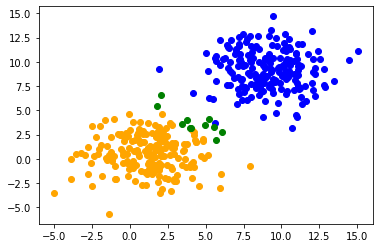

In [12]:
#розділення міток від массиву значень
y_test = np.copy(test[:,2])
test_comp = np.delete(test,2,1)

#результат на тестовій вибірці
result_test = np.array(predict(test_comp, w, b))
accuracy_, FP_FN_test, TP_test, TN_test = accuracy(result_test, test_comp, y_test)

FP_FN = test_comp[FP_FN_test]
TP = test_comp[TP_test]
TN = test_comp[TN_test]
print("Accuracy on test split:", accuracy_)

plt.scatter(TP[:,0], TP[:,1], color = "orange")
plt.scatter(TN[:,0], TN[:,1], color = "blue")
plt.scatter(FP_FN[:,0], FP_FN[:,1], color = "green")